In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
sns.set()
pd.set_option('display.max_columns', 89)
pd.set_option('display.max_rows', 80)

In [2]:
data = pd.read_csv('FIFA 2019 players.csv')

In [3]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Let's drop unnecessory columns.

In [4]:
data.drop(['Unnamed: 0', 'ID', 'Photo', 'Flag', 'Club Logo'], axis=1, inplace=True)

In [5]:
data.shape

(18207, 84)

In [6]:
data.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Check missing values

In [7]:
missing_data = pd.DataFrame(data.isnull().sum()[data.isnull().sum() != 0], columns=['Missing'])
missing_data['Percentage'] = round((missing_data['Missing']/len(data))*100, 2)
missing_data ['dtypes'] = data[missing_data.index].dtypes
missing_data

,Missing,Percentage,dtypes
Club,241,1.32,object
Preferred Foot,48,0.26,object
International Reputation,48,0.26,float64
Weak Foot,48,0.26,float64
Skill Moves,48,0.26,float64
Work Rate,48,0.26,object
Body Type,48,0.26,object
Real Face,48,0.26,object
Position,60,0.33,object
Jersey Number,60,0.33,float64


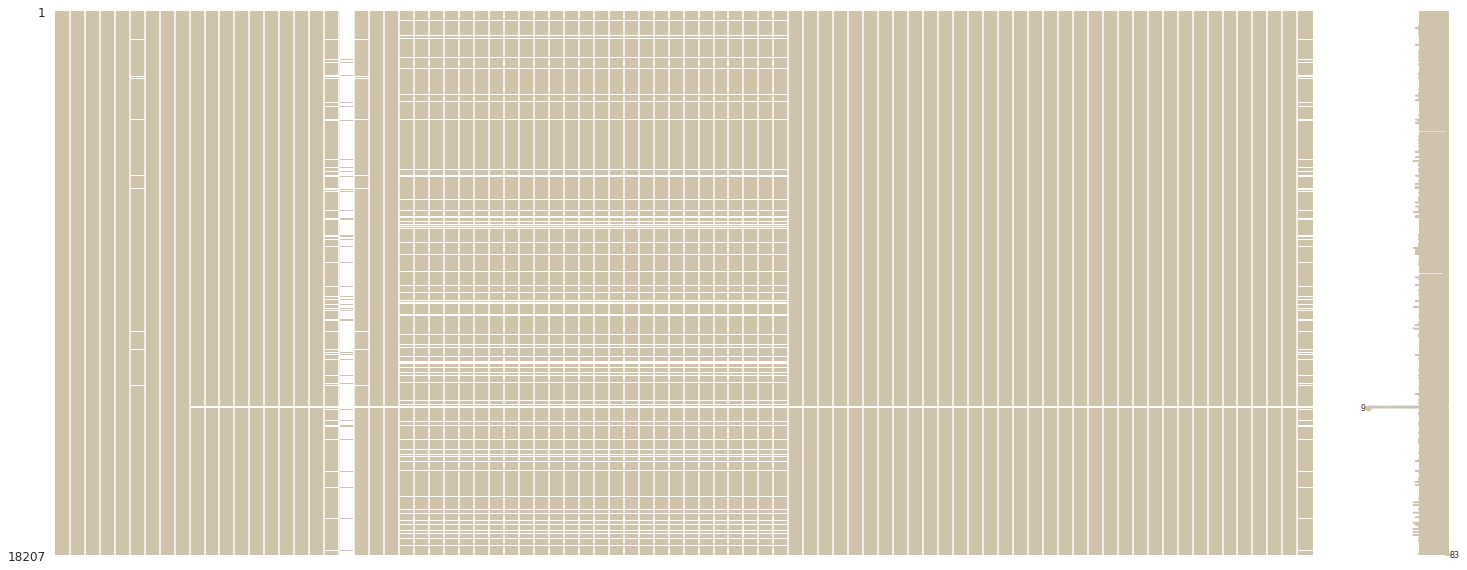

In [8]:
#f, ax1 = plt.subplots(1,1, figsize=(10,6))
msno.matrix(data,  color= (207/255, 196/255, 171/255), fontsize=10)

Loaned From feature have 93% missing values. we can just drop it.

In [9]:
#removing 'loaned from' 
data.drop('Loaned From', axis=1, inplace=True)

## Features with same number of missing values
Some feature have same number of missing values it's means that those missing feature values belong to same id. As we can see visual representation.

## Skill Features
All Skill Features have 48 missing values.<br>
these skills directly related to player over all rating. So we will impute missing values on bases of overall rating.

In [10]:
skills_features_missing = missing_data[missing_data['Missing'] == 48].index.tolist()

#checking one skill
x = data[['Preferred Foot', 'Overall']]
x.loc[(x['Overall'] == 62)].isnull().sum()

Preferred Foot    48
Overall            0
dtype: int64

So each skill have missing values on overall rating 62 so I will impute by median

In [11]:
for skill_feature in skills_features_missing:
    if data[skill_feature].dtypes != 'O':
        data[skill_feature].fillna(99.9, inplace=True)
        data.loc[(data['Overall'] == 62) & 
                 (data[skill_feature] == 99.9), skill_feature] = data[(data['Overall'] == 62) & 
                                                                      (data[skill_feature] != 99.9)][skill_feature].median()
    else:
        data[skill_feature].fillna('99.9', inplace=True)
        data.loc[(data['Overall'] == 62) & 
                 (data[skill_feature] == '99.9'), skill_feature] = data[(data['Overall'] == 62) & 
                                                                      (data[skill_feature] != '99.9')][skill_feature].mode()[0]
#x['Weak Foot'].fillna(99.9, inplace=True)
#x.loc[(x['Overall'] == 62) & (x['Weak Foot'] == 99.9), 'Weak Foot'] = x[(x['Overall'] == 62) & (x['Weak Foot'] != 99.9)]['Weak Foot'].median()

## Position & Jersey Number
Both features have same number of missing values. this means that both feature missing values belong to same id.

In [12]:
#let's check both id's
position_null = list(np.where(data['Position'].isnull())[0])
jersey_null = list(np.where(data['Jersey Number'].isnull())[0])
if position_null == jersey_null:
    print("Both features belong to same id's")
else:
    print("They have different id's")

Both features belong to same id's


Players jersey number assign on the basis position or reputation. In our case same players positions also null. let's check if we could have positions ratings 

In [13]:
data.iloc[position_null]

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
5018,R. Raldes,37,Bolivia,70,70,NaN,€0,€0,1574,Right,1.0,3.0,2.0,Medium/ Medium,Normal,No,NaN,NaN,NaN,NaN,5'11,172lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,36.0,72.0,56.0,19.0,41.0,32.0,51.0,33.0,57.0,47.0,46.0,59.0,66.0,58.0,74.0,58.0,53.0,75.0,47.0,74.0,65.0,26.0,48.0,77.0,64.0,79.0,70.0,70.0,16.0,8.0,11.0,12.0,13.0,NaN
6736,J. Arce,33,Bolivia,68,68,NaN,€0,€0,1664,Left,1.0,3.0,3.0,High/ Low,Lean,No,NaN,NaN,NaN,NaN,5'9,154lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.0,73.0,65.0,64.0,52.0,67.0,40.0,36.0,50.0,70.0,71.0,74.0,73.0,61.0,75.0,61.0,63.0,73.0,41.0,61.0,48.0,36.0,67.0,63.0,69.0,67.0,12.0,34.0,33.0,16.0,13.0,15.0,16.0,8.0,NaN
7922,L. Gutiérrez,33,Bolivia,67,67,NaN,€0,€0,1619,Right,1.0,3.0,2.0,Medium/ Medium,Normal,No,NaN,NaN,NaN,NaN,5'11,190lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,39.0,59.0,33.0,37.0,44.0,48.0,40.0,35.0,47.0,64.0,61.0,68.0,68.0,60.0,51.0,72.0,78.0,78.0,47.0,76.0,62.0,49.0,45.0,42.0,54.0,72.0,71.0,64.0,11.0,7.0,8.0,12.0,12.0,NaN
9905,R. Vargas,23,Bolivia,66,69,NaN,€0,€0,1632,Right,1.0,4.0,3.0,High/ Low,Normal,No,NaN,NaN,NaN,NaN,5'7,143lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,70.0,54.0,57.0,63.0,74.0,57.0,41.0,53.0,72.0,71.0,73.0,79.0,63.0,91.0,62.0,75.0,80.0,33.0,59.0,26.0,17.0,70.0,56.0,67.0,64.0,19.0,24.0,23.0,13.0,11.0,11.0,7.0,9.0,NaN
10628,D. Bejarano,26,Bolivia,65,66,NaN,€0,€0,1536,Right,1.0,2.0,2.0,Medium/ Medium,Normal,No,NaN,NaN,NaN,NaN,5'9,154lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0,48.0,44.0,66.0,31.0,57.0,31.0,29.0,64.0,59.0,68.0,61.0,54.0,65.0,76.0,24.0,58.0,56.0,47.0,29.0,57.0,63.0,38.0,32.0,39.0,57.0,68.0,69.0,68.0,14.0,12.0,11.0,14.0,12.0,NaN
13236,J. McNulty,33,Scotland,62,62,Rochdale,€120K,€1K,1510,Right,1.0,3.0,2.0,Medium/ Medium,Normal,No,NaN,NaN,NaN,NaN,5'9,154lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.0,44.5,52.0,58.0,40.0,59.0,44.0,38.0,51.0,60.0,67.0,67.0,64.0,57.0,66.0,55.0,64.0,64.0,64.0,46.0,55.0,53.0,52.0,51.0,46.0,54.0,54.0,57.0,54.0,11.0,11.0,11.0,11.0,11.0,NaN
13237,J. Barrera,29,Nicaragua,62,62,Boyacá Chicó FC,€300K,€1K,1532,Right,1.0,3.0,2.0,Medium/ Medium,Normal,No,NaN,NaN,NaN,NaN,5'9,154lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.0,44.5,52.0,58.0,40.0,59.0,44.0,38.0,51.0,60.0,67.0,67.0,64.0,57.0,66.0,55.0,64.0,64.0,64.0,46.0,55.0,53.0,52.0,51.0,46.0,54.0,54.0,57.0,54.0,11.0,11.0,11.0,11.0,11.0,NaN
13238,J. Stead,35,England,62,62,Notts County,€140K,€3K,1573,Right,1.0,3.0,2.0,Medium/ Medium,Normal,No,NaN,NaN,NaN,NaN,5'9,154lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.0,44.5,52.0,58.0,40.0,59.0,44.0,38.0,51.0,60.0,67.0,67.0,64.0,57.0,66.0,55.0,64.0,64.0,64.0,46.0,55.0,53.0,52.0,51.0,46.0,54.0,54.0,57.0,54.0,11.0,11.0,11.0,11.0,11.0,NaN
13239,A. Semprini,20,Italy,62,72,Brescia,€425K,€1K,1610,Right,1.0,3.0,2.0,Medium/ Medium,Normal,No,NaN,NaN,NaN,NaN,5'9,154l

These players positions also have null values. I will impute value on the basis of player overall rating and international reputation. One thing we can notice that these all players reputation is 1 out of 5.

In [14]:
data['Position']= data.groupby(['International Reputation', 'Overall'])['Position'].transform(lambda x: x.fillna(x.mode()[0]))
data['Jersey Number'] = data.groupby(['International Reputation', 'Overall'])['Jersey Number'].transform(lambda x: x.fillna(x.mode()[0]))

## Each Position Feature
Our data have ratings of players in each position. <p>['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB','LCB', 'CB', 'RCB', 'RB']</p> They are in string form according to dataset they ratings so i will convert into int. Impute their null values on the basis of overall rating.

In [15]:
players_positions = list(data.columns[22:48])
#first i will impute values than convert to int
for pos in players_positions:
    data[pos] = data.groupby('Overall')[pos].transform(lambda x: x.fillna(x.mode()[0]))

## Convert Position features to int
Let's check first they have same values. I'll check length of features if they it's mean that have same type of values.

In [16]:
for pos in players_positions:
    print(len(data[pos].unique()), end=', ')

93, 93, 93, 105, 102, 102, 102, 105, 101, 101, 101, 100, 92, 92, 92, 100, 95, 99, 99, 99, 95, 98, 108, 108, 108, 98, 

So we have different values. We will use some other technique.

Each position values like '88+2'. np.char.split no working on this so what we can do is we split and impute value each value but it will take a lot of time. We have 26 features and each feature have 18K rows that will take a lot of time. <br>
So what to do i'll use python dictionaries and replace each value which is the robust solution i came with.

In [17]:
#defining function
def split_and_get_final_value(pos):
    converted_values = {}
    def split_value(value):
        x = value.split('+')
        x = int(x[0]) + int(x[1])
        return x
    for value in list(data[pos].unique()):
        converted_values[value] = split_value(value)
    return converted_values

In [18]:
#fill nan values
for pos in players_positions:
    data[pos] = data[pos].replace(split_and_get_final_value(pos))

In [19]:
data.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",2021,5'7,159lbs,90,90,90,94,95,95,95,94,95,95,95,93,86,86,86,93,66,63,63,63,66,61,49,49,49,61,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",2022,6'2,183lbs,94,94,94,92,93,93,93,92,91,91,91,91,84,84,84,91,68,64,64,64,68,64,56,56,56,64,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",2022,5'9,150lbs,87,87,87,92,92,92,92,92,92,92,92,91,84,84,84,91,68,63,63,63,68,63,50,50,50,63,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",2020,6'4,168lbs,76,76,76,73,74,74,74,73,74,74,74,75,78,78,78,75,69,66,66,66,69,63,52,52,52,63,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",2023,5'11,154lbs,85,85,85,90,90,90,90,90,91,91,91,91,90,90,90,91,80,80,80,80,80,76,69,69,69,76,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### Missing Column
In position feature some players have GK position but their is no feature with name GK in dataset. So After searching i found out GK feature present name GKPositioning. So i'll rename to GK.

In [20]:
data.rename(columns= {'GKPositioning': 'GK'}, inplace=True)

In [21]:
data.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GK,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",2021,5'7,159lbs,90,90,90,94,95,95,95,94,95,95,95,93,86,86,86,93,66,63,63,63,66,61,49,49,49,61,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",2022,6'2,183lbs,94,94,94,92,93,93,93,92,91,91,91,91,84,84,84,91,68,64,64,64,68,64,56,56,56,64,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",2022,5'9,150lbs,87,87,87,92,92,92,92,92,92,92,92,91,84,84,84,91,68,63,63,63,68,63,50,50,50,63,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",2020,6'4,168lbs,76,76,76,73,74,74,74,73,74,74,74,75,78,78,78,75,69,66,66,66,69,63,52,52,52,63,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",2023,5'11,154lbs,85,85,85,90,90,90,90,90,91,91,91,91,90,90,90,91,80,80,80,80,80,76,69,69,69,76,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


## Club
There are 652 different club categories and 241 missing values. We can impute these clubs by grouping some related vaiables to club and fill with the most repeated club or we simply drop those records. One more thing we can do is assign new variable to these values. I will assign new variable name "no club" by considering  free players because these players don't have any club club joined and contract validation also nulls which confirms this.

In [22]:
print('Number of Clubs:',len(data['Club'].unique()))
data['Club'].fillna('no club', inplace=True)

Number of Clubs: 652


## Release Clause
A release clause is the minimum amount of money you're willing to accept for that player.

In [23]:
data['Release Clause'] = data.groupby('Overall')['Release Clause'].transform(lambda x: x.fillna(x.mode()[0]))

## Joined
Joined feature tells about When player joined the club. We don't have feature related to this to fill missing values. Players who are free they have no joined information so I will impute new category "Free Player". For remaining what i'll do is i'll impute and missing values on the basis of clubs. When most of the players joined specific club.

In [24]:
data.loc[data['Club'] == 'no club', 'Joined'] = 'free player'
data['Joined'] = data.groupby(['Club'])['Joined'].transform(lambda x: x.fillna(x.mode()[0]))

## Contract Valid Until
I will impute same as Joined features because both are same type of features.

In [25]:
data.loc[data['Club'] == 'no club', 'Contract Valid Until'] = 'free player'
data['Contract Valid Until'] = data.groupby(['Club'])['Contract Valid Until'].transform(lambda x: x.fillna(x.mode()[0]))

In [26]:
data.tail()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GK,GKReflexes,Release Clause
18202,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,€1K,1307,Right,1.0,2.0,2.0,Medium/ Medium,Lean,No,CM,22.0,"May 3, 2017",2019,5'9,134lbs,44,44,44,46,46,46,46,46,47,47,47,46,47,47,47,46,46,47,47,47,46,47,47,47,47,47,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,€1K,1098,Right,1.0,2.0,2.0,Medium/ Medium,Normal,No,ST,21.0,"Mar 19, 2018",2020,6'3,170lbs,47,47,47,41,44,44,44,41,42,42,42,40,37,37,37,40,32,33,33,33,32,31,34,34,34,31,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,B. Worman,16,England,47,67,Cambridge United,€60K,€1K,1189,Right,1.0,3.0,2.0,Medium/ Medium,Normal,No,ST,33.0,"Jul 1, 2017",2021,5'8,148lbs,47,47,47,47,48,48,48,47,46,46,46,46,40,40,40,46,36,32,32,32,36,35,30,30,30,35,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€60K,€1K,1228,Right,1.0,3.0,2.0,Medium/ Medium,Lean,No,RW,34.0,"Apr 24, 2018",2019,5'10,154lbs,49,49,49,49,48,48,48,49,47,47,47,48,41,41,41,48,38,34,34,34,38,37,33,33,33,37,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K
18206,G. Nugent,16,England,46,66,Tranmere Rovers,€60K,€1K,1321,Right,1.0,3.0,2.0,Medium/ Medium,Lean,No,CM,33.0,"Oct 30, 2018",2019,5'10,176lbs,45,45,45,47,46,46,46,47,47,47,47,48,47,47,47,48,48,48,48,48,48,48,49,49,49,48,41.0,34.0,46.0,48.0,30.0,43.0,40.0,34.0,44.0,51.0,57.0,55.0,55.0,51.0,63.0,43.0,62.0,47.0,60.0,32.0,56.0,42.0,34.0,49.0,33.0,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0,€165K


In [27]:
data.isnull().sum()[data.isnull().sum() != 0]

Series([], dtype: int64)

## Converting to numerical features which are present as categorical

### Money features
We have to convert player Value, Wage and Release Clause string price unit values into float. <br>

First we will check players with 0 values and i'll drop them because no one accept player with 0 value and they will act as outlier too. Most of the players are free so i would consider them drop

In [28]:
data[data['Value'] == '€0'].head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GK,GKReflexes,Release Clause
452,L. Paredes,24,Argentina,80,85,no club,€0,€0,2122,Right,2.0,4.0,4.0,Medium/ Medium,Normal,No,CM,5.0,free player,free player,5'11,165lbs,73,73,73,77,77,77,77,77,79,79,79,78,81,81,81,78,77,79,79,79,77,76,74,74,74,76,76.0,55.0,60.0,84.0,73.0,78.0,79.0,78.0,82.0,82.0,75.0,69.0,77.0,74.0,77.0,82.0,61.0,79.0,69.0,80.0,79.0,72.0,74.0,82.0,57.0,74.0,73.0,75.0,72.0,9.0,14.0,6.0,9.0,10.0,€25.7M
538,A. Granqvist,33,Sweden,80,80,no club,€0,€0,1797,Right,2.0,4.0,2.0,High/ Medium,Normal,No,LCB,4.0,free player,free player,6'4,185lbs,64,64,64,58,60,60,60,58,60,60,60,59,66,66,66,59,70,76,76,76,70,72,81,81,81,72,49.0,51.0,81.0,73.0,37.0,49.0,36.0,40.0,67.0,63.0,46.0,49.0,55.0,76.0,36.0,74.0,64.0,67.0,83.0,59.0,81.0,82.0,54.0,49.0,79.0,78.0,82.0,83.0,79.0,7.0,9.0,12.0,10.0,15.0,€25.7M
568,A. Lunev,26,Russia,79,81,no club,€0,€0,1217,Right,1.0,3.0,1.0,Medium/ Medium,Normal,No,GK,12.0,free player,free player,6'2,176lbs,75,75,75,76,79,79,79,76,79,79,79,79,75,75,75,79,79,78,78,78,79,79,79,79,79,79,16.0,14.0,17.0,25.0,13.0,15.0,18.0,17.0,32.0,17.0,58.0,54.0,36.0,76.0,50.0,24.0,60.0,27.0,70.0,13.0,26.0,20.0,11.0,63.0,15.0,69.0,18.0,20.0,12.0,80.0,73.0,65.0,77.0,85.0,€21.3M
677,I. Smolnikov,29,Russia,79,79,no club,€0,€0,2038,Right,2.0,3.0,3.0,High/ High,Lean,No,RB,2.0,free player,free player,5'10,154lbs,72,72,72,75,74,74,74,75,75,75,75,77,76,76,76,77,80,77,77,77,80,80,75,75,75,80,73.0,61.0,69.0,79.0,57.0,72.0,49.0,46.0,75.0,72.0,84.0,90.0,80.0,75.0,76.0,67.0,85.0,93.0,68.0,57.0,65.0,71.0,77.0,72.0,41.0,73.0,76.0,76.0,80.0,7.0,12.0,10.0,8.0,15.0,€21.3M
864,Hilton,40,Brazil,78,78,Montpellier HSC,€0,€18K,1807,Right,2.0,3.0,3.0,Medium/ Medium,Normal,Yes,CB,4.0,"Aug 1, 2011",2019,5'11,172lbs,60,60,60,60,61,61,61,60,64,64,64,62,69,69,69,62,69,75,75,75,69,70,78,78,78,70,60.0,45.0,79.0,73.0,51.0,63.0,42.0,48.0,72.0,73.0,33.0,38.0,51.0,70.0,60.0,55.0,79.0,54.0,76.0,58.0,76.0,79.0,50.0,67.0,64.0,70.0,83.0,77.0,76.0,12.0,7.0,11.0,12.0,13.0,€20M


In [29]:
data.drop(data[data['Value'] == '€0'].index, axis=0, inplace=True)

In [30]:
data.shape

(17955, 83)

In [31]:
def convert_to_float(data_value):
    try:
        value = float(data_value[1:-1])
        currency_unit = data_value[-1:]
        if currency_unit == 'M':
            value = value * 1000000
        elif currency_unit == 'K':
            value = value * 1000
    except:
        value = 0
    return value

In [32]:
data['Value'] = data['Value'].apply(convert_to_float)
data['Wage'] = data['Wage'].apply(convert_to_float)
data['Release Clause'] = data['Release Clause'].apply(convert_to_float)

### Height 

In [33]:
def get_height(string):
    x = string.split("'")
    x = (int(x[0]) * 12) + int(x[1])
    return x

heights = {}

for i in list(data['Height'].unique()):
    heights[i] = get_height(i)

In [34]:
data['Height'] = data['Height'].replace(heights)

In [35]:
data['Height'].dtypes

dtype('int64')

### Weight

In [36]:
def get_weight(string):
    x = string.split("l")
    x = int(x[0])
    return x

weights = {}

for i in list(data['Weight'].unique()):
    weights[i] = get_weight(i)

In [37]:
data['Weight'] = data['Weight'].replace(weights)

In [38]:
data.Weight.dtypes

dtype('int64')

### Contract Valid Until

In [39]:
data['Contract Valid Until'].unique()

array(['2021', '2022', '2020', '2023', '2019', '2024', 'Jun 30, 2019',
       '2025', '2026', 'Dec 31, 2018', '2018', 'May 31, 2020',
       'Jun 30, 2020', 'May 31, 2019', 'Dec 31, 2019', 'Jan 1, 2019',
       'Jun 1, 2019', 'Jan 4, 2019', 'Jan 31, 2019', 'Jan 7, 2019',
       'Jan 2, 2019', 'Jan 6, 2019', 'Oct 14, 2019', 'Jan 3, 2019',
       'May 4, 2019', 'Jan 12, 2019', 'Jan 25, 2019', 'Jan 18, 2019',
       'Dec 1, 2019', 'Nov 30, 2018', 'Feb 27, 2020', 'Jan 5, 2019',
       'Jan 15, 2019', 'Jan 30, 2019', 'Jan 11, 2019', 'Jan 20, 2019'],
      dtype=object)

Some players contract have only years. There is no month and month day available. <br>
I'm considering their contract will expire on start of year.

In [40]:
months = {
    'Jun':'6',
    'Dec':'12',
    'May':'5',
    'Jan':'1',
    'Oct':'10',
    'Nov':'11',
    'Feb':'2',
    'Jul': '7',
    'Apr': '4',
    'Mar': '3',
    'Aug': '8',
    'Sep': '9'
}
dates = {}
for i in data['Contract Valid Until'].unique():
    if len(i) == 4:
        dates[i] = f'1/1/{i}'
    else:
        month = i.split(' ')
        dates[i] = months[month[0]] + '/' + month[1][:-1] + '/' + month[2]

In [41]:
data['Contract Valid Until'] = data['Contract Valid Until'].replace(dates)
#convert to datetime
data['Contract Valid Until'] = pd.to_datetime(data['Contract Valid Until'])
data['Contract Valid Until'].dtypes

dtype('<M8[ns]')

### Joined Dates

In [42]:
def convert_to_date(string):
    date = string.split(' ')
    date = months[date[0]] + '/' + date[1][:-1] + '/' + date[2]
    return date

In [43]:
data['Joined'] = data['Joined'].apply(convert_to_date)
#convert to datetime
data['Joined'] = pd.to_datetime(data['Joined'])
data['Joined'].dtypes

dtype('<M8[ns]')

## Fix body Type

M Salah have lean body but it is showing PLAYER_BODY_TYPE_25 let's fix it

In [44]:
data.loc[data['Body Type'] == 'PLAYER_BODY_TYPE_25', 'Body Type'] = 'Lean'

## Categorical data

In [45]:
data[[col for col in data.columns if data[col].dtypes == 'O']].head()

,Name,Nationality,Club,Preferred Foot,Work Rate,Body Type,Real Face,Position
0,L. Messi,Argentina,FC Barcelona,Left,Medium/ Medium,Messi,Yes,RF
1,Cristiano Ronaldo,Portugal,Juventus,Right,High/ Low,C. Ronaldo,Yes,ST
2,Neymar Jr,Brazil,Paris Saint-Germain,Right,High/ Medium,Neymar,Yes,LW
3,De Gea,Spain,Manchester United,Right,Medium/ Medium,Lean,Yes,GK
4,K. De Bruyne,Belgium,Manchester City,Right,High/ High,Normal,Yes,RCM


## Numerical Data

In [46]:
data[[col for col in data.columns if data[col].dtypes != 'O']].head()

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GK,GKReflexes,Release Clause
0,31,94,94,110500000.0,565000.0,2202,5.0,4.0,4.0,10.0,2004-07-01,2021-01-01,67,159,90,90,90,94,95,95,95,94,95,95,95,93,86,86,86,93,66,63,63,63,66,61,49,49,49,61,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,33,94,94,77000000.0,405000.0,2228,5.0,4.0,5.0,7.0,2018-07-10,2022-01-01,74,183,94,94,94,92,93,93,93,92,91,91,91,91,84,84,84,91,68,64,64,64,68,64,56,56,56,64,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,26,92,93,118500000.0,290000.0,2143,5.0,5.0,5.0,10.0,2017-08-03,2022-01-01,69,150,87,87,87,92,92,92,92,92,92,92,92,91,84,84,84,91,68,63,63,63,68,63,50,50,50,63,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,27,91,93,72000000.0,260000.0,1471,4.0,3.0,1.0,1.0,2011-07-01,2020-01-01,76,168,76,76,76,73,74,74,74,73,74,74,74,75,78,78,78,75,69,66,66,66,69,63,52,52,52,63,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,27,91,92,102000000.0,355000.0,2281,4.0,5.0,4.0,7.0,2015-08-30,2023-01-01,71,154,85,85,85,90,90,90,90,90,91,91,91,91,90,90,90,91,80,80,80,80,80,76,69,69,69,76,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


## Save Clean Data

In [47]:
data.to_csv('FIFA 2019 Players Data Cleaned.csv', index=False)